![logo](../../../LogoLine_horizon_C3S.png)

# Spatio-temporal data completeness and consistency of remote sensing-derived ice sheet surface elevation changes over Antarctica

Production date: 31-05-2025

Dataset version: 4.0

Produced by: Yoni Verhaegen and Philippe Huybrechts (Vrije Universiteit Brussel)

## 🌍 Use case: Using the ice sheet surface elevation change time series as an indicator for the Antarctic Ice Sheet imbalance in the context of the current climate change

## ❓ Quality assessment question
* **"How does the spatial coverage of the ice sheet surface elevation change data, aggregated from distinct satellite sensors and missions over time, change and how does it affect estimates of (cumulative) ice sheet surface elevation changes?"**

The C3S surface elevation change (SEC) product quantifies changes in the surface elevation of ice sheets, providing crucial insights into their response to climate change and changing ice sheet dynamics. Satellite remote sensing is a valueable and practical method for regularly monitoring such surface elevation changes over those large, remote ice sheet areas. SEC data on the Climate Data Store (CDS) are derived from satellite radar altimetry, where the time delay between a transmitted pulse from the radar and its surface echo is converted into distance, adjusted for the satellite's known elevation. Repeated measurements of the surface elevation from multiple satellite missions, combined with corrections and interpolation, therefore allows to create a consistent time series of gridded ice sheet surface elevation changes [[1](https://doi.org/10.1016/j.epsl.2018.05.015), [2](https://doi.org/10.5194/tc-13-427-2019)].

While these techniques generally offer extensive spatial and temporal coverage, they also have limitations, such as inconsistencies due to data aggregation from different satellite sensors and missions, and difficulties with data processing and data acquisition over complex terrain. This notebook assesses the suitability of the CDS SEC dataset (version 4.0) as an indicator of ice sheet imbalance under climate change. It specifically evaluates the dataset's maturity and quality related to data completeness, focusing on its spatio-temporal coverage and consistency across time series derived from multiple satellite sources. In this notebook, we only focus on the Antarctic Ice Sheet (AIS).

🚨 **Although this notebook deals with the Antarctic Ice Sheet only, surface elevation change data for the Greenland Ice Sheet are also available.**

## 📢 Quality assessment statements

```{admonition} These are the key outcomes of this assessment
:class: note
- Surface elevation change (SEC) detection by radar altimetry is a valuable tool for assessing the impacts of climate change on ice sheets, but it has notable limitations that users should be aware of. The C3S SEC data have been merged from different satellite missions over time, each having their own (dis)advantages in terms of data acquisition limitations and spatio-temporal sampling coverage/frequency. For the C3S AIS SEC dataset in particular, the lack of post-processing to fill remaining data gaps results in a rather immature final product. Even though significant improvements with respect to data completeness have occured during the more recent years, persistent data gaps remain around the polar gap and over complex terrain around the ice sheet margins. Since some of the areas with the most prominent SEC are within the areas of least coverage, special attention is required. 
- Without additional processing, the C3S SEC data for the AIS are found to not be suitable for reliable statistical analysis, such as calculating means, variability, trends, due to the high proportion of missing values, noisier data and relatively higher error values when compared to the GrIS SEC dataset. Due to the lack of post-processing, some signals in the SEC time series may therefore reflect changing sampling conditions and/or processing limitations rather than actual SEC. In the context of long-term monitoring and climate change studies, the C3S AIS SEC dataset mostly lacks the robustness and reliability required to accurately track surface elevation changes and estimate cumulative mass changes. Users of the C3S AIS SEC data product are therefore most likely required to implement additional processing to derive glaciologically interpretable surface elevation changes.
```

## 📋 Methodology

### Dataset description

Surface elevation change detection by satellite radar altimetry is a useful tool to grasp the impact of climate change on the ice sheets. In that regard, the C3S dataset on the Climate Data Store (CDS) provides monthly surface elevation change (SEC) values and their uncertainty for the Greenland (GrIS) and Antarctic Ice Sheet (AIS) on a 25 km spatial resolution grid. The core principle involves measuring surface elevations at different times and comparing them to detect changes. In this dataset, they are derived using satellite radar altimetry that contain data from multiple satellite missions, which are grouped together into a consistent time series for each pixel. Surface elevation changes are reported with units of meter per year and are available since 1992. Data are provided in NetCDF format as gridded data and are available for both the GrIS (excluding peripheral glaciers and ice caps) and AIS (including ice shelves). 

These ice sheet surface elevation change rates are mathematically expressed as:

$\dfrac{dh}{dt} = \dfrac{h_{t_2}-h_{t_1}}{t_{2}-t_{1}}$

where:
- $h$ is the surface elevation (m)
- $t$ the time (yr)

Note that in the dataset itself, surface elevation changes are, however, actually calculated from linear regressions to a time series. The mentioned time for such a SEC measurement is the center of a 3-year of 5-year moving window (for the GrIS) and a 5-year moving window (for the AIS) used to derive the SEC values. Users should hereby note that not only accumulation or ablation (i.e. the surface mass balance) can cause the surface elevation to increase or decrease. The surface elevation change rate at a certain pixel contains signals from various processes and are generally split up into contributions from the surface mass balance (surface ablation and accumulation), ice-flow dynamics (dynamical thinning or thickening) and other processes:

$\dfrac{dh}{dt}_{obs} = \dfrac{SMB}{\rho_m} + \dfrac{D'}{\rho_i} + $ other

where the first term on the right-hand side ($SMB$ in units kg m$^{-2}$ yr$^{-1}$) includes elevation changes from surface mass balance processes and the second one ($D'$ in units kg m$^{-2}$ yr$^{-1}$) due to ice dynamic processes. The term $\rho_m$ is the density of the material lost or gained (snow, firn or ice) and $\rho_i$ that of ice. Other factors that may affect surface elevation changes are basal mass balance processes (which is generally of less importance when compared to the surface mass balance), as well as firn densification/compaction and vertical bedrock motion (which, however, do not have a direct effect on mass changes of the ice sheet) [[7](https://doi.org/10.5194/tc-5-173-2011), [8](https://doi.org/10.1029/2021JF006505)]. Ice dynamics is furthermore only relevant with respect to mass changes when ice discharge across the grounding line is considered. For the GrIS as a whole, contributions to mass changes are currently driven by both SMB and ice flow dynamics at an approximately equal magnitude (i.e. 60% SMB and 40% ice dynamics), while for the AIS they are almost entirely driven by ice flow dynamics [[1](https://doi.org/10.1016/j.epsl.2018.05.015), [2](https://doi.org/10.5194/tc-13-427-2019), [9](https://doi.org/10.1038/s41586-019-1855-2), [10](https://doi.org/10.1038/s41586-018-0179-y)]. 

In this notebook, we use version 4.0. For a more detailed description of the data acquisition and processing methods, we refer to the [documentation on the CDS](https://cds.climate.copernicus.eu/datasets/satellite-ice-sheet-elevation-change?tab=overview) and the [ECMWF Confluence Wiki](https://confluence.ecmwf.int/pages/viewpage.action?pageId=355345393) (Copernicus Knowledge Base).

### Structure and (sub)sections

**[](satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-1)**

* [](satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-1-1)
* [](satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-1-2)
* [](satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-1-3)
* [](satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-1-4)
  
**[](satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-2)**
* [](satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-2-1)
* [](satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-2-2)

**[](satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-3)**
* [](satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-3-1)
* [](satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-3-2)
* [](satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-3-3)
  
**[](satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-4)**

## 📈 Analysis and results

(satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-1)=
### 1. Data preparation and processing

(satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-1-1)=
#### 1.1 Import packages

First we load the packages:

In [1]:
from matplotlib import colors
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr
from datetime import datetime
import pandas as pd
import seaborn as sns
import scipy.stats
from scipy.ndimage import gaussian_filter
from c3s_eqc_automatic_quality_control import diagnostics, download
import os
plt.style.use("seaborn-v0_8-notebook")

(satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-1-2)=
#### 1.2 Define request and download

Then we define requests for download from the CDS and download the ice sheet surface elevation change data.

In [15]:
# Select the domain: "greenland" or "antarctica"
domains = ["antarctica"]
collection_id = "satellite-ice-sheet-elevation-change"

# Define the request
request = {
    "variable": "all",
    "format": "zip",
    "climate_data_record_type": "tcdr",
    "version": "4_0",
}

# Download the data
datasets = {}
for domain in domains:
    print(f"{domain=}")
    datasets[domain] = download.download_and_transform(
        collection_id,
        request | {"domain": domain},
    ).compute()
    
print('Download completed.')

domain='antarctica'


100%|██████████| 1/1 [00:00<00:00, 20.94it/s]
                                             

Download completed.


(satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-1-3)=
#### 1.3 Display and inspect data

We can read and inspect the data. Let us print out the data to inspect its structure:

In [16]:
datasets

{'antarctica': <xarray.Dataset> Size: 108MB
 Dimensions:          (y: 180, x: 216, time: 307, bounds: 2)
 Coordinates:
   * time             (time) datetime64[ns] 2kB 1994-11-01T09:21:19.687500 ......
     grid_x_bounds    (bounds, x) float32 2kB -2.6e+06 -2.575e+06 ... 2.8e+06
     grid_y_bounds    (bounds, y) float32 1kB -2.2e+06 -2.175e+06 ... 2.3e+06
     grid_lon_bounds  (bounds, y, x) float32 311kB 229.8 229.5 ... 50.35 50.6
     grid_lat_bounds  (bounds, y, x) float32 311kB -59.37 -59.54 ... -57.51
     time_bounds      (bounds, time) datetime64[ns] 5kB 1992-05-02T06:21:26.71...
   * x                (x) float32 864B -2.588e+06 -2.562e+06 ... 2.788e+06
   * y                (y) float32 720B -2.188e+06 -2.162e+06 ... 2.288e+06
 Dimensions without coordinates: bounds
 Data variables:
     longitude        (y, x) float32 156kB 229.8 229.5 229.2 ... 50.37 50.63
     latitude         (y, x) float32 156kB -59.53 -59.69 -59.85 ... -57.83 -57.66
     sec              (y, x, time) float3

The version 4.0 is a gridded dataset at a 25 km spatial resolution containing monthly values of the ice sheet surface elevation change rate $\frac{dh}{dt}$ (`sec` in m/yr) and its uncertainty (`sec_uncert` in m/yr) since 1992. The time for a measurement mentioned in the dataset is the center of a 5-year moving window used to derive the surface elevation change values. For the AIS, uncertainties are reported as the sum of the modeling error, the cross-calibration error, and the measurement uncertainties. These can be considered 1-sigma precision errors. A land mask (`surface_type`), slope mask (`high_slope`), validity flags (`sec_ok`) are also included. 

Let us check the total temporal extent of the data:

In [17]:
time_bds = datasets['antarctica']
time_bounds_values = time_bds['time_bounds'].values
begin_period = datetime.strptime(str(time_bounds_values[0][0]).split('T')[0], "%Y-%m-%d")
end_period = datetime.strptime(str(time_bounds_values[-1][-1]).split('T')[0], "%Y-%m-%d")
time_difference = end_period - begin_period
decimal_years = time_difference.days / 365.25

print(f'The begin period of the dataset is {begin_period.date()} and the end period is {end_period.date()}, which is a total of time {decimal_years:.2f} years.')

The begin period of the dataset is 1992-05-02 and the end period is 2022-11-01, which is a total of time 30.50 years.


(satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-1-4)=
#### 1.4 Data handling and creating functions

Let us now perform some data handling and define a plotting function before getting started with the analysis:

In [18]:
def get_maps(ds, domains):
    (sec_name,) = set(ds.data_vars) & {"sec", "dhdt"}
    da = ds[sec_name]
    da.attrs["long_name"] = "Surface elevation change rate"

    if 'greenland' in domains:
        da_dh = ds["dh"]
        da_dh.attrs["long_name"] = "Surface elevation change"
        da_dh_ok = ds["dhdt_ok"]
        da_dh_ok.attrs["long_name"] = "Validity of surface elevation change"

    da_err = ds[f"{sec_name}_uncert"]
    da_err.attrs["long_name"] = "Surface elevation change precision error"

    (mask_name,) = set(ds.data_vars) & {"land_mask", "surface_type"}
    mask = ds[mask_name] > 0
    missing = 100 * (da.sizes["time"] - da.notnull().sum("time")) / da.sizes["time"]
    missing.attrs = {"long_name": "Missing data", "units": "%"}

    if 'antarctica' in domains:
        (mask_name,) = set(ds.data_vars) & {"land_mask", "surface_type"}
        mask = (ds[mask_name] > 0) & (ds['latitude'] > -81.5)
        masked_da = da.where(mask)
        missing_lat = 100 * (da.sizes["time"] - masked_da.notnull().sum("time")) / da.sizes["time"]
        missing_lat.attrs = {"long_name": "Missing data above latitude", "units": "%"}
        missing_lat = missing_lat.where(mask)

    year_to_ns = 1.0e9 * 60 * 60 * 24 * 365
    coeffs = []
    da_cumsum = da.cumsum("time") / 12
    for degree, name in enumerate(("linear_trend", "acceleration"), start=1):
        coeff = da_cumsum.polyfit("time", degree)["polyfit_coefficients"].sel(
            degree=degree, drop=True
        )
        coeff = degree * coeff * (year_to_ns**degree)
        coeff.attrs = {
            "units": f"{da.attrs['units'].split('/', 1)[0]} yr$^{{-{degree}}}$",
            "long_name": f"{da.attrs['long_name']} {name}".replace("_", " "),
        }
        coeffs.append(coeff.rename(name))

    data_vars = [
        da.rename("sec"),
        da_err.rename("sec_err"),
        mask.rename("mask"),
        missing.rename("missing"),
        ds["high_slope"],
    ]

    if 'greenland' in domains:
        data_vars.append(da_dh.rename("dh"))
        data_vars.append(da_dh_ok.rename("dhdt_ok"))
    if 'antarctica' in domains:
        data_vars.append(missing_lat.rename("missing_lat"))

    ds = xr.merge(data_vars + coeffs)
    
    return ds.mean("time", keep_attrs=True)

# Select the specific dataset you want to process, e.g., "greenland"
datasets_original = datasets
selected_ds = datasets["antarctica"]
datasets = get_maps(selected_ds, domains)
datasets_get_maps = datasets

# Define plotting function
def plot_maps_single(da, suptitle=None, **kwargs):
    kwargs.setdefault("cmap", "RdBu")
    # Create subplots with Polar Stereographic projection
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.Stereographic(central_longitude=0, central_latitude=-90, true_scale_latitude=-71)})
    
    # Plot the data 
    subset_da = da
    im = subset_da.plot.imshow(ax=ax, add_colorbar=False, **kwargs)
    
    # Set extent and plot features
    ax.set_extent([da.coords['x'].values.min(), da.coords['x'].values.max(), da.coords['y'].values.min(), da.coords['y'].values.max()], ccrs.Stereographic(central_longitude=0, central_latitude=-90, true_scale_latitude=-71))
    ax.add_feature(cfeature.LAND, edgecolor='black', color='white')
    ax.add_feature(cfeature.OCEAN, color='lightblue')
    ax.coastlines()
    if suptitle:
        ax.set_title(suptitle)
    ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    
    # Add colorbar
    cb = fig.colorbar(im, ax=ax, extend='both', shrink=0.49, label=f"{da.attrs['long_name']} [{da.attrs['units']}]")

    plt.tight_layout()
    plt.show()

Now, our dataset array only holds the most important information, such as the multiyear mean surface elevation change rates (`sec`) and the arithmetic mean precision error (`sec_err`). With the function above, we also calculated linear and quadratic trends of surface elevation changes, as well as the amount of missing values. 

With everything ready, let us now begin with the analysis:

(satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-2)=
### 2. Quantifying Antarctic Ice Sheet surface elevation changes in space and time

(satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-2-1)=
#### 2.1 Spatial distribution of surface elevation changes

We begin by plotting the Antarctic multiyear mean surface elevation change rate $\overline {\frac{dh}{dt}}$ between the beginning and end period with the defined plotting function:

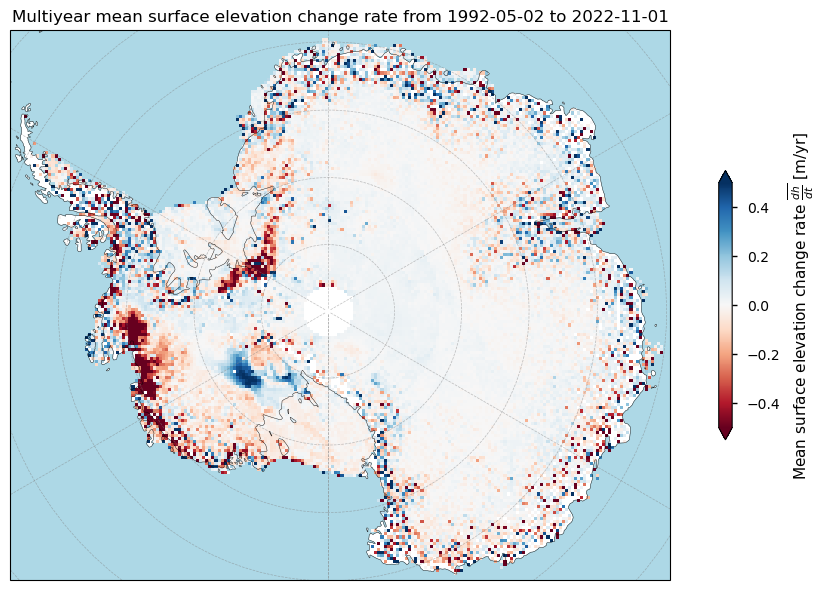

In [6]:
# Apply the function to the surface elevation change rate data
da = datasets["sec"]
da.attrs = {
    "long_name": r"Mean surface elevation change rate $\overline {\frac{dh}{dt}}$",
    "units": "m/yr",
}

# Define dataset to be plotted
suptitle_text = rf"Multiyear mean surface elevation change rate from {begin_period.date()} to {end_period.date()}"
_ = plot_maps_single(
    da,
    vmin=-0.5,
    vmax=0.5,
    suptitle=suptitle_text,
)

*Figure 1. Multiyear mean surface elevation change (SEC) over Antarctica from all available data in the SEC dataset on the Climate Data Store. It must be noted that the period over which the data are averaged in this figure may differ, depending on available data (e.g. with respect to the varying polar gap or other missing data).*

The figure displays the multiyear mean surface elevation change of the Antarctic ice sheet from 1992 to 2022 in meter per year (m/yr). In many parts of the ice sheet, the pattern, however, exhibits a noisy appearance. A notable data gap is also present around the South Pole (i.e. the well-known 'polar gap', of which the extent varies depending on the satellite mission). It must be noted that the period over which the data are averaged in Figure 1 may differ, depending on the availability of the data (e.g. due to the varying polar gap or other missing data in steep marginal regions). It is therefore only a quick representation of the data and cannot be used for proper glaciological analysis.

Let us quantify the ice sheet-wide average value:

In [7]:
print(f'The Antarctic ice sheet-wide average surface elevation change rate value between {begin_period.date()} and {end_period.date()} is {(np.nanmean(da.values)):.5f} m/yr.')

The Antarctic ice sheet-wide average surface elevation change rate value between 1992-05-02 and 2022-11-01 is -0.01691 m/yr.


The negative value indicates that the surface of the ice sheet, in general, has been slightly lowering during the last several decades, resulting in net negative values. Again, we note the presence of abundant noisy and missing data (see later for more details), which may impact the robustness of this value.

(satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-2-2)=
#### 2.2 Time series of surface elevation changes

Let us now express the average surface elevation change for the ice sheet as a whole as a time series:

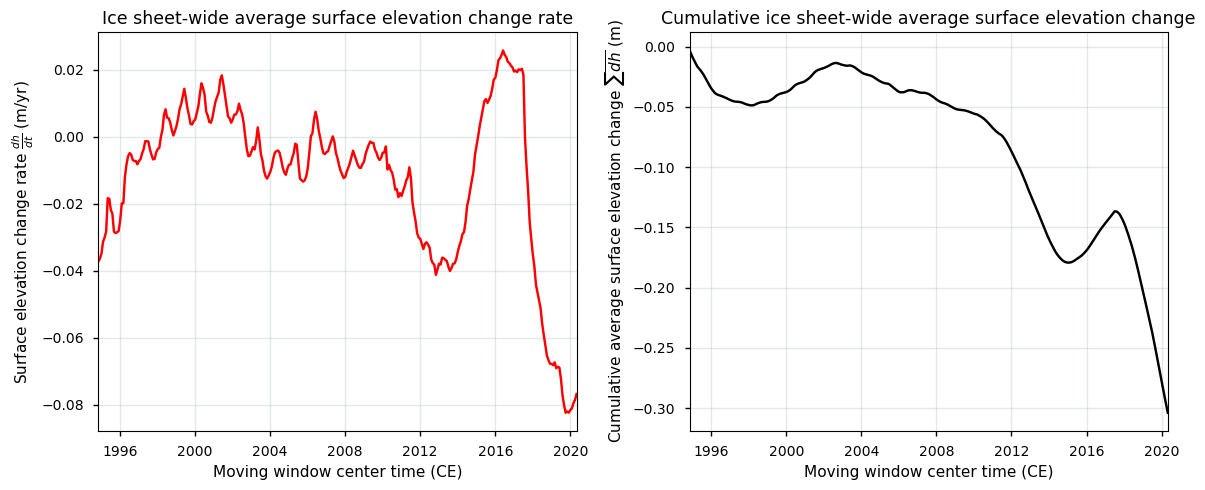

In [8]:
# Define the function
def get_timeseries(ds):
    ds["time"].attrs["long_name"] = "Time"

    (sec_name,) = set(ds.data_vars) & {"sec", "dhdt"}
    da = ds[sec_name]
    da.attrs["long_name"] = "Surface elevation change rate"

    if 'greenland' in domains:
        da_dh = ds["dh"]
        da_dh.attrs["long_name"] = "Surface elevation change"
        da_dh.attrs["units"] = "m"

    da_err = ds[f"{sec_name}_uncert"]
    da_err.attrs["long_name"] = "Surface elevation change rate error"

    (mask_name,) = set(ds.data_vars) & {"land_mask", "surface_type"}
    mask = ds[mask_name] > 0
    missing = 100 * (mask.sum() - da.notnull().sum(("x", "y"))) / mask.sum()
    missing.attrs = {"long_name": "Missing data", "units": "%"}

    if 'antarctica' in domains:
        (mask_name,) = set(ds.data_vars) & {"land_mask", "surface_type"}
        mask = (ds[mask_name] > 0) & (ds['latitude'] > -81.5) 
        masked_da = da.where(mask)
        missing_lat = 100 * (mask.sum() - masked_da.notnull().sum(("x", "y"))) / mask.sum()
        missing_lat.attrs = {"long_name": "Missing data above latitude", "units": "%"}

    data_vars = [
        da.rename("sec"),
        da_err.rename("sec_err"),
        missing.rename("missing"),
    ]

    if 'greenland' in domains:
        data_vars.append(da_dh.rename("dh"))
    if 'antarctica' in domains:
        data_vars.append(missing_lat.rename("missing_lat"))
    
    ds = xr.merge(data_vars)

    # Apply mean to all variables 
    mean_ds = ds.mean(("x", "y"), keep_attrs=True)
    
    # Combine the results
    ds = xr.merge([mean_ds])

    return ds

selected_ds = datasets_original["antarctica"]
datasets_timeseries = get_timeseries(selected_ds)

# Plot the data
datasets_timeseries["time"].attrs["units"] = "yr"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(datasets_timeseries["time"],datasets_timeseries["sec"],'r')
ax1.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax1.set_xlim(np.min(datasets_timeseries["time"]),np.max(datasets_timeseries["time"]))
ax1.set_xlabel("Moving window center time (CE)")
ax1.set_ylabel(r"Surface elevation change rate $\frac{dh}{dt}$ (m/yr)")
ax1.set_title("Ice sheet-wide average surface elevation change rate",fontsize=12.5);
ax2.plot(datasets_timeseries["time"],(np.cumsum(datasets_timeseries["sec"]/12)),'k')
ax2.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax2.set_xlim(np.min(datasets_timeseries["time"]),np.max(datasets_timeseries["time"]))
ax2.set_xlabel("Moving window center time (CE)")
ax2.set_ylabel("Cumulative average surface elevation change $\sum \overline{dh}$ (m)")
ax2.set_title("Cumulative ice sheet-wide average surface elevation change",fontsize=12.5);
plt.tight_layout()
plt.show()

*Figure 2. Time series of (left) ice sheet-wide surface elevation change (SEC) and (right) cumulative ice sheet-wide surface elevation change over Antarctica from the SEC dataset on the Climate Data Store.*

Overall, the surface elevation of the Antarctic Ice Sheet has shown a long-term declining trend. The relatively consistent downward trajectory of the cumulative surface elevation change (SEC) curve in the figure above may therefore serve as a potential indicator of ongoing ice sheet imbalance, assuming that the underlying dataset is of sufficient quality, particularly with regard to spatio-temporal completeness and the consistency of time series derived from multiple satellite missions.

However, one notable anomaly in the SEC curve is the presence of pronounced spikes around ca. 2012 (negative) and 2016 (positive), which may warrant further investigation. Hence, these peaks may not be due to actual elevation changes, but instead may have occurred due to changes in sampling and/or processing limitations, because such sharp peaks in the SEC values around these periods are not noted in other studies for the AIS (e.g. [[2](https://tc.copernicus.org/articles/13/427/2019/), [5](https://doi.org/10.5194/essd-14-3573-2022)]). In order to further investigate this, let us therefore inspect the spatio-temporal data coverage and the amount of missing data in the SEC dataset.

(satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-3)=
### 3. Inspecting spatio-temporal data coverage and missing data

(satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-3-1)=
#### 3.1 Amount of missing data over time

Let us now plot the amount of missing data as a time series in order to investigate the data coverage. In the dataset, this can be assessed comparing the amount of pixels with valid data to the (fixed-in-time) land mask (`surface_type`), where pixels with a value larger than 0 represent ice-covered grid points of the main ice sheet body or ice shelves. The time series looks as follows:

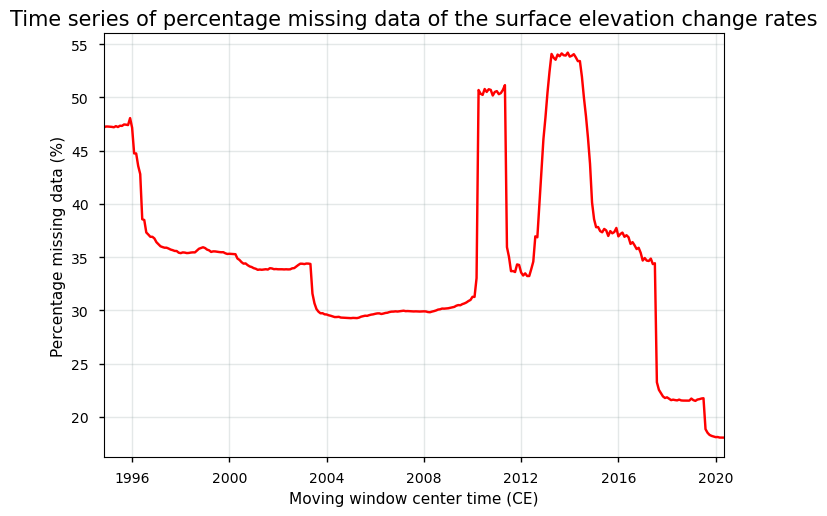

In [9]:
fig, ax = plt.subplots()
ax.plot(datasets_timeseries["time"],datasets_timeseries["missing"],'r')
ax.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax.set_xlim(np.min(datasets_timeseries["time"]),np.max(datasets_timeseries["time"]))
ax.set_xlabel("Moving window center time (CE)")
ax.set_ylabel("Percentage missing data (%)")
ax.set_title("Time series of percentage missing data of the surface elevation change rates",fontsize=15);
plt.show()

*Figure 3. Time series of missing data of the surface elevation change data over Antarctica from the SEC dataset on the Climate Data Store.*

In the figure above, we note several jumps in the curve which are presumably due to changes in the used data acquisition methods (e.g. varying satellite missions), but can also be due to data processing limitations. When inspecting the graph, some notable increases in missing data seem to occur after 2010. Moreover, the periods around ca. 2012 and 2016 are characterized by a drastic switch in missing data, which may also be linked to the spikes in the surface elevation change time series noted earlier in Figure 2. This indicates that some signals in the SEC time series may reflect changing sampling conditions and/or processing limitations, rather than actual SEC, which is hence an important factor to consider when interprating these data due to the lack of applied corrections (such as gap filling).

(satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-3-2)=
#### 3.2 Spastial distribution of missing data

Let us have the spatial distribution of the missing data plotted:

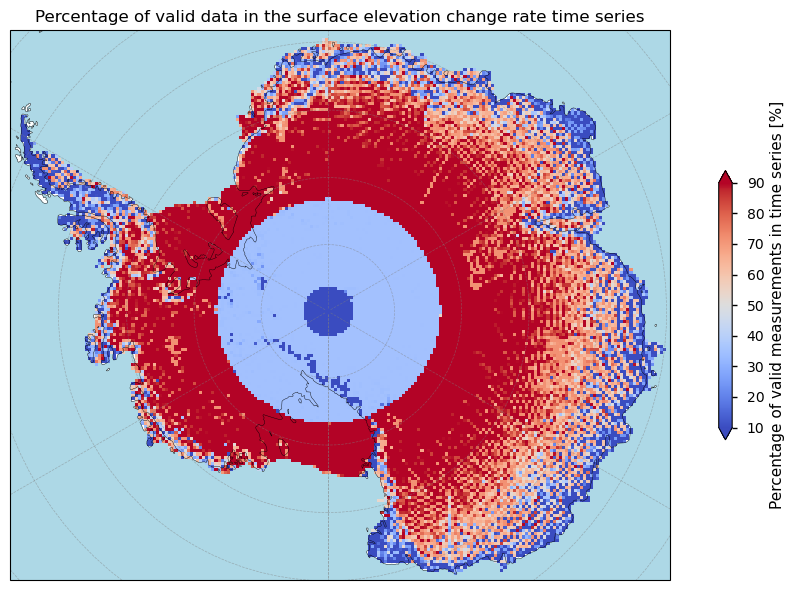

In [10]:
# Apply the function to the surface elevation change missing data
antarctica_dataset = datasets_original['antarctica']
land_mask = antarctica_dataset['surface_type']

da = 100-datasets_get_maps["missing"]
da = da.where(land_mask.values != 0, np.nan)
da.attrs = {
    "long_name": r"Percentage of valid measurements in time series",
    "units": "%",
}

# Plot the data
suptitle_text = rf"Percentage of valid data in the surface elevation change rate time series"
_ = plot_maps_single(
    da,
    cmap="coolwarm",
    vmin=10,
    vmax=90,
    suptitle=suptitle_text,
)

*Figure 4. Spatial distribution of valid data of the surface elevation change data over Antarctica from the SEC dataset on the Climate Data Store.*

The figure above displays the percentage of valid data in the surface elevation change (SEC) data for Antarctica, which further allows to inspect its data completeness. As discussed before, data gaps in the SEC dataset arise primarily from limited satellite coverage beyond certain mission-specific latitudes (i.e. the "polar gap" around the South Pole), and from processing limitations or challenging conditions, such as complex and steep terrain around the marginal regions (e.g. the Antarctic Peninsula and the transantarctic mountains). Both areas are clearly marked by a lesser amount of missing data in the figure above, providing additional insight into the pattern of missing data.

The central Antarctic region near the South Pole exhibits a low coverage due to the so-called “polar gap”, where satellite altimetry coverage is limited. Early satellite missions like ERS-1, ERS-2, and Envisat had coverage limitations south of 81.5°S, creating significant gaps. CryoSat-2 (launched in 2010) improved polar coverage up to 88°S but still left significant gaps in the central polar region and partly around the margins [[2](https://doi.org/10.5194/tc-13-427-2019), [3](https://doi.org/10.1029/2019GL082182), [4](https://climate.esa.int/media/documents/ST-UL-ESA-AISCCI-E3UB-001-v1.0.pdf)]. The Sentinel-3 mission has recently further enhanced the sampling frequency, but coverage is again rather limited in the coastal regions due to the absence of an interferometric SAR. Near the margins, challenging conditions, such as complex and steep terrain, limit the efficient acquisition of sufficient valid data [[4](https://climate.esa.int/media/documents/ST-UL-ESA-AISCCI-E3UB-001-v1.0.pdf)]. Unlike the Greenland SEC dataset, these data gaps for Antarctica have not been filled up during post-processing, resulting in more pronounced areas with missing data.

(satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-3-3)=
#### 3.3 Link with satellite mission and surface characteristics

Let us further investigate this pattern and check whether we can link the amount of missing data to the surface characteristics provided with the data. Therefore, we check how the amount of missing data outside of the polar gap (taken as 81.5°S) is linked to the surface slope (i.e. as a proxy for the terrain complexity) and the magnitude of the surface elevation changes at a certain pixel:

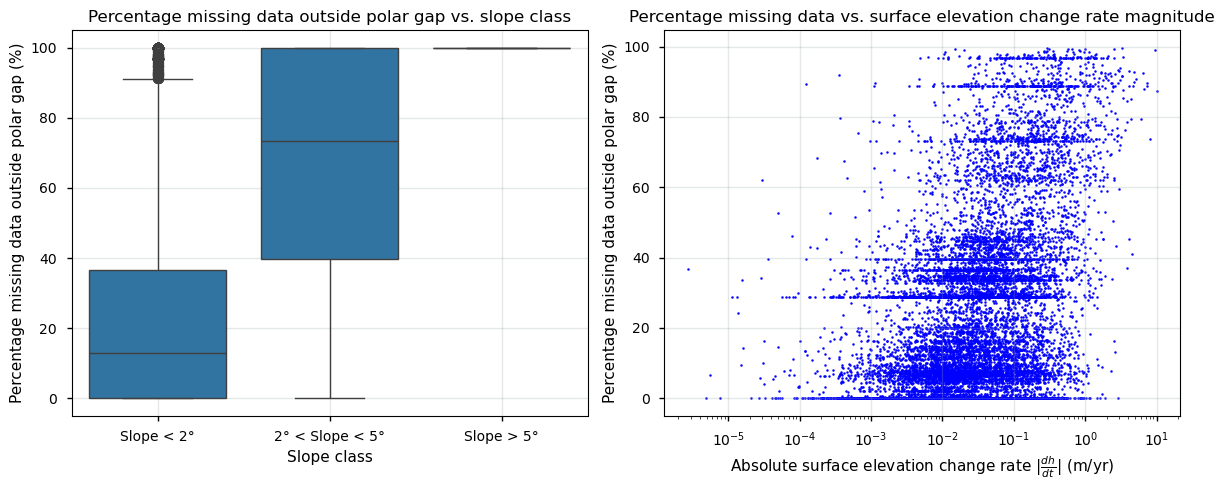

In [11]:
datasets = {
    'high_slope': datasets['high_slope'],  
    'sec_err': datasets['sec_err'],
    'sec': datasets['sec'],
    'missing_lat':datasets['missing_lat']
}

# Flatten the arrays and remove NaN values for the boxplot
df = pd.DataFrame({
    'slopemask_ais': np.ravel(datasets["high_slope"]),
    'mean_missing_ais': np.ravel(datasets["missing_lat"])
}).dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(data=df, x='slopemask_ais', y='mean_missing_ais', ax=ax1)
ax1.set_ylabel(r'Percentage missing data outside polar gap (%)')
ax1.set_xlabel('Slope class')
ax1.set_title("Percentage missing data outside polar gap vs. slope class")
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(["Slope < 2°", "2° < Slope < 5°", "Slope > 5°"])
#ax1.set_yscale('log')
ax1.grid(color='#95a5a6',linestyle='-',alpha=0.25)

# Scatter plot
sec_err = np.ravel(datasets["missing_lat"])
sec = np.ravel(datasets["sec"])

# Remove NaN values for the scatter plot
mask = ~np.isnan(sec_err) & ~np.isnan(sec)
ax2.scatter(abs(sec[mask]), abs(sec_err[mask]), color='blue', s=2)
ax2.set_xlabel(r'Absolute surface elevation change rate $|\frac{dh}{dt}|$ (m/yr)')
ax2.set_ylabel(r'Percentage missing data outside polar gap (%)')
ax2.set_title("Percentage missing data vs. surface elevation change rate magnitude")
#ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.grid(color='#95a5a6',linestyle='-',alpha=0.25)

plt.tight_layout()
plt.show()

*Figure 5. Relationship between the percentage missing data and (left) the slope of the terrain and (right) the magnitude of the ice sheet surface elevation change of a certain pixel over Antarctica from the SEC dataset on the Climate Data Store.*

The graphs above display the data quality of radar altimetry-derived surface elevation changes over the AIS, highlighting challenges in areas with higher surface slopes and high surface elevation changes. The first graph shows that regions with gentle slopes (<2°) have the least missing data, indicating better radar performance on flat surfaces. As slopes increase to more than 5°, practically all data are missing, reflecting the difficulty of capturing reliable measurements due to slope-induced errors in complex terrain. The second graph illustrates the relationship between the magnitude of surface elevation change at a certain pixel and the percentage of missing data in that same pixel. Areas with larger elevation changes, often found along ice sheet margins with complex, high-slope terrain, tend to have higher data gaps, indicating that dynamic regions are harder to monitor consistently. This relationship, however, is obviously not deterministic, as some significant of scatter remains.

Overall, the graphs reveal that flatter, more stable regions provide more reliable radar data, while steeper and dynamic regions are more prone to significant amounts of missing data. Recognizing these limitations is crucial for accurately interpreting SEC data and assessing climate change impacts on ice sheets. 

Let us inspect how varying satellite missions perform with respect to the amount of missing data in the C3S product based on the time period that they are/were active:

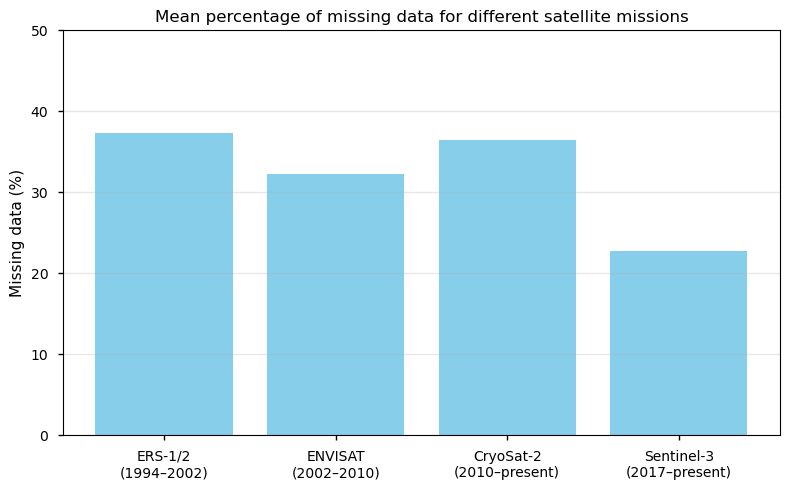

In [43]:
# Define Antarctica dataset
ds=antarctica_dataset

# Define missing data per time period
(mask_name,) = set(ds.data_vars) & {"land_mask", "surface_type"}
flagged_pixels = ds[mask_name] > 0   # True where surface_type >0

labels = [
    "ERS-1/2\n(1994–2002)",
    "ENVISAT\n(2002–2010)",
    "CryoSat-2\n(2010–present)",
    "Sentinel-3\n(2017–present)"
]
periods = [
    ("1994-01-01", "2002-12-31"),
    ("2002-01-01", "2010-12-31"),
    ("2010-01-01", "2099-12-31"),
    ("2017-01-01", "2099-12-31"),
]

percent_missing = []

for start, end in periods:
    sel = ds.sel(time=slice(start, end))
    
    sec_nan = sel["sec"].isnull()
    
    # Broadcast flagged_pixels over time
    flagged_broadcast = flagged_pixels.expand_dims(time=sel.time)
    
    # Count of pixels with surface_type >0 per timestep
    n_flagged = flagged_broadcast.sum(dim=("x","y"))
    
    # Among them, how many are NaN in sec
    n_missing_in_flagged = (sec_nan & flagged_broadcast).sum(dim=("x","y"))
    
    # % missing among flagged pixels
    perc = 100 * n_missing_in_flagged / n_flagged
    
    # Average over time steps
    perc_avg = perc.mean().item()
    percent_missing.append(perc_avg)

# Plot
plt.figure(figsize=(8,5))
plt.bar(labels, percent_missing, color="skyblue")
plt.ylabel("Missing data (%)")
plt.title("Mean percentage of missing data for different satellite missions")
plt.ylim(0, 50)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

*Figure 6. Average percentage of missing data for various satellite missions (time periods) over Antarctica from the SEC dataset on the Climate Data Store.*

The graphs above clearly show the different missing data characteristics of the various satellite missions, which are due to changes in the used data acquisition methods/spatial coverage and data processing limitations (e.g. the size of the polar gap, the susceptibility to slope-induced errors over complex terrain, etc.). The highest amount of missing data are found in the oldest period during the epoch of ERS-1/2. The most recent period, which combines data from CryoSat-2 and Sentinel-3, shows the lowest percentage of missing data, reflecting advancements in radar altimetry technology and data processing methods. Again, these findings display the progressive improvement in the observational capability of remote sensing-derived surface elevation changes over Antarctica, while also underlining the persistent challenges in obtaining complete records.

(satellite_satellite-ice-sheet-elevation-change_consistency-assessment_q02:section-4)=
### 4. Short summary and take-home messages

The C3S SEC data represent surface elevation changes of the AIS acquired by satellite radar altimetry that have been merged from different satellite missions over time. Each of those satellite missions are characterized by their own (dis)advantages. The time series of the ice sheet-wide average SEC rate and the cumulative SEC changes show a general trend of surface elevation lowering, reflecting an overall net lowering of the surface. Using the C3S Antarctic Ice Sheet (AIS) surface elevation change (SEC) time series as an indicator for the Antarctic ice sheet imbalance, however, presents several implications. 

For example, the varying spatio-temporal coverage of the data that are being fed into these trends should be considered for proper evaluation and interpretation. The most important causes of persistent data gaps in the C3S SEC product for the AIS are the polar gap around the South Pole and complex terrain around the margins. However, combining CryoSat-2 and Sentinel-3 during the more recent years has improved the spatio-temporal coverage of the product greatly, even though unfilled gaps remain in some areas. This is especially the case in high-slope and complex marginal regions. These persistent and unfilled data gaps significantly complicate the robustness and data completeness of SEC measurements of the C3S AIS product. Since some of the areas with the most prominent surface elevation changes are consequently within the area of least coverage, special attention is required. Users of C3S AIS SEC data product are therefore most likely required to implement additional processing to derive glaciologically interpretable surface elevation changes.

In general, radar altimeters tend to perform better in the central, flat regions of Antarctica due to simpler topography and relatively stable surfaces, while marginal zones with complex and dynamic terrain (where the most significant SEC occur) exhibit a higher invalid data acquisition and an increased uncertainty. These gaps pose challenges for assessing radar altimetry-derived volume and mass changes, making C3S SEC data for Antarctica generally less reliable. To address these limitations, integrating multiple datasets, such as gap-filling through laser altimetry over the margins and sloped terrain (e.g. ICESat/ICESat-2) or by ice sheet model output, can improve the robustness of surface elevation change estimates. Additionally, higher-resolution datasets, regional studies, and advanced data processing techniques (e.g. machine learning) can help fill data gaps and enhance the accuracy and reliability of SEC measurements, providing a more comprehensive understanding of the current changes of the surface of the AIS [[2](https://doi.org/10.5194/tc-13-427-2019), [3](https://doi.org/10.1029/2019GL082182), [5](https://doi.org/10.5194/essd-14-3573-2022), [6](https://doi.org/10.1029/2020GL090572)].

## ℹ️ If you want to know more

### Key resources

- ["Ice sheet surface elevation change rate for Greenland and Antarctica from 1992 to present derived from satellite observations"](https://cds.climate.copernicus.eu/datasets/satellite-ice-sheet-elevation-change?tab=overview) on the CDS
- [Documentation on the CDS](https://cds.climate.copernicus.eu/datasets/satellite-ice-sheet-elevation-change?tab=overview) and the [ECMWF Confluence Wiki](https://confluence.ecmwf.int/pages/viewpage.action?pageId=355345393) (Copernicus Knowledge Base).
- [Copernicus climate change indicators: ice sheets](https://climate.copernicus.eu/climate-indicators/ice-sheets)
- [An easy-to-read article about ice sheet altimetry](https://blogs.egu.eu/divisions/cr/2023/03/03/ice-radar-altimetry/)
- [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control` prepared by [B-Open](https://www.bopen.eu).

### References

- [[1](https://doi.org/10.1016/j.epsl.2018.05.015)] Sørensen, L. S., Simonsen, S. B., Forsberg, R., Khvorostovsky, K., Meister, R., and Engdahl, M. E. (2018). 25 years of elevation changes of the Greenland Ice Sheet from ERS, Envisat, and CryoSat-2 radar altimetry, Earth and Planetary Science Letters. 495. https://doi.org/10.1016/j.epsl.2018.05.015

- [[2](https://doi.org/10.5194/tc-13-427-2019)] Schröder, L., Horwath, M., Dietrich, R., Helm, V., van den Broeke, M.R., and Ligtenberg, S.R.M. (2019). Four decades of Antarctic surface elevation change from multi-mission satellite altimetry. The Cryosphere, 13, p. 427-449. https://doi.org/10.5194/tc-13-427-2019

- [[3](https://doi.org/10.1029/2019GL082182)] Shepherd, A., Gilbert, L., Muir, A.S., Konrad, H., McMillan, M., Slater, T., Briggs, H.K., Sundal, A. V., Hogg A.E., and Engdahl, M.E. (2019). Trends in Antarctic Ice Sheet elevation and mass. Geophysical Research Letters, 46, p. 8174-8183. https://doi.org/10.1029/2019GL082182

- [[4](https://climate.esa.int/media/documents/ST-UL-ESA-AISCCI-E3UB-001-v1.0.pdf)] Shepherd, A., Fantin, D., and Engdahl, M. (2020). ESA Climate Change Initiative (CCI+)
Essential Climate Variable (ECV): Antarctic_Ice_Sheet_cci+ (AIS_cci+) End-to-end Uncertainty Budget (E3UB), ST-UL-ESA-AISCCI+-E3UB-001. https://climate.esa.int/media/documents/ST-UL-ESA-AISCCI-E3UB-001-v1.0.pdf

- [[5](https://doi.org/10.5194/essd-14-3573-2022)] Nilsson, J., Gardner, A. S., and Paolo, F. S. (2022). Elevation change of the Antarctic Ice Sheet: 1985 to 2020, Earth Syst. Sci. Data, 14, 3573–3598, https://doi.org/10.5194/essd-14-3573-2022

- [[6](https://doi.org/10.1029/2020GL090572)] Brunt, K. M., Smith, B. E., Sutterley, T. C., Kurtz, N. T., and Neumann, T. A. (2021). Comparisons of satellite and airborne altimetry with ground-based data from the interior of the Antarctic ice sheet. Geophysical Research Letters, 48, e2020GL090572. https://doi.org/10.1029/2020GL090572

- [[7](https://doi.org/10.5194/tc-5-173-2011)] Sørensen, L. S., Simonsen, S. B., Nielsen, K., Lucas-Picher, P., Spada, G., Adalgeirsdottir, G., Forsberg, R., and Hvidberg, C. S. (2011). Mass balance of the Greenland ice sheet (2003–2008) from ICESat data – the impact of interpolation, sampling and firn density, The Cryosphere, 5, 173–186, https://doi.org/10.5194/tc-5-173-2011

- [[8](https://doi.org/10.1029/2021JF006505)] Khan, S. A., Bamber, J. L., Rignot, E., Helm, V., Aschwanden, A., Holland, D. M., van den Broeke, M., King, M., Noël, B., Truffer, M., Humbert, A., Solgaard, A. M., Box, J. E., Colgan, W. T., Wuite, J., Mouginot, J., Andersen, O. B., Csatho, B., Felikson, D., Fettweis, X., Forsberg, R., Gogineni, P., Joughin, I., Kjeldsen, K. K., Kuschnerus, M., Langen, P. L., Luckman, A., Luthcke, S. B., McMillan, M., Merryman Boncori, J. P., Morlighem, M., Mottram, R., Nagler, T., Nagy, T., Paden, J., Palmer, S., Poinar, K., Shepherd, A., Smith, B., Stearns, L. A., van Angelen, J. H., van der Wal, W., van de Berg, W. J., van Wessem, M., Velicogna, I., Wahr, J., Wendt, A., Wouters, B., & Zwally, H. J. (2022). Greenland mass trends from airborne and satellite altimetry during 2011–2020. Journal of Geophysical Research: Earth Surface, 127(3). https://doi.org/10.1029/2021JF006505

- [[9](https://doi.org/10.1038/s41586-019-1855-2)] The IMBIE Team (2019). Mass balance of the Greenland Ice Sheet from 1992 to 2018. Nature, 579, 233–239. https://doi.org/10.1038/s41586-019-1855-2

- [[10](https://doi.org/10.1038/s41586-018-0179-y)] The IMBIE Team (2018). Mass balance of the Antarctic Ice Sheet from 1992 to 2017. Nature 558, 219–222. https://doi.org/10.1038/s41586-018-0179-y